In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import os

# Ẩn cảnh báo PerformanceWarning
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../Datasets/data.csv")

In [3]:
df_heart_attack = df[df["Heart Attack Risk"] == 1].reset_index(drop=True)

# BIỂU ĐỒ HEATMAP: SỐ NGƯỜI BỊ RỦI RO ĐAU TIM THEO TỪNG MỨC ĐỘ STRESS VÀ NHÓM TUỔI

1. **Các thuộc tính sử dụng**

- `Stress Level`: Mức độ stress của những đối tượng được khảo sát theo mức thang từ 1-10 trong đó 10 là lớn nhất.
- `Heart Attack Risk`: thuộc tính chỉ nhận 2 giá trị 0 (không) hoặc 1 (có), thể hiện nguy cơ mắc bệnh tim, giúp phân loại người có và - không có nguy cơ.
- `Age`: độ tuổi của các đối tướng được khảo sát.

2. **Loại biểu đồ**

      **Heatmap**: Heatmap (bản đồ nhiệt) là một công cụ hữu ích trong phân tích dữ liệu, giúp trực quan hóa mức độ tập trung hoặc cường độ của các giá trị trong một tập hợp dữ liệu

3. **Ý nghĩa của biểu đồ**

      Giá trị của 1 ô ứng với các dòng là mức độ căng thẳng, các cột là nhóm tuổi, giá trị càng lớn, màu xanh càng đậm

4. **Nguyên nhân sử dụng**

      Biểu đồ sử dụng dải màu xanh, giá trị lớn hơn tương ứng với màu xanh đậm hơn giúp người dùng hình dung được các giá trị thay đổi như thế nào

5. **Kết luận**

- Đối với nhóm tuổi 18 - 20, số người bị rủi ro đau tim theo từng mức độ căng thẳng là ít, chứng tỏ nguyên nhân gây ra đau tim ở lứa tuổi không phải do sự căng thẳng. Điều này hợp lí vì ở độ tuổi này, sự căng thẳng là không nhiều
- Đối với các nhóm tuổi 21 - 30, 31 - 40, 41 - 50, số người bị rủi ro đau tim theo từng mức độ căng thẳng là tương đối cao (dao động quanh 40), thể hiện nguyên nhân bị rủi ro đau tim một phần là do sự căng thẳng. Điều này hợp lí vì ở nhóm tuổi này, có rất nhiều thứ phải lo toan nên sự căng thẳng là nhiều
- Đối với nhóm tuổi 81 - 90, số người bị rủi ro đau tim ở các mức độ căng thẳng cao (mức 7, 8, 10) dao động quanh 55, thể hiện ở lứa tuổi này càng căng thẳng, nguy cơ bị đau tim càng tăng. Điều này hợp lí vì trái tim của người già suy yếu nên chỉ cần có tác động về mặt tinh thần, nguy cơ đau tim là rất cao


- Chia ra các nhóm tuổi
- Liệt kê các giá trị tuổi có trong df_heart_attack


In [4]:
ages = sorted(df_heart_attack["Age"].unique().tolist())

- Tuổi phân bố từ 18 đến 90
- Chia thành 8 nhóm tuổi: 18 - 20, 21 - 30, 31 - 40, ...., 81 - 90


In [5]:
age_groups = ["18 - 20"]

for i in range(21, 81 + 1, 10):
    age_groups.append(str(i) + " - " + str(i + 9))

- Tạo df để vẽ heatmap gồm 2 cột Age, Stress Level


In [6]:
df_heatmap = df_heart_attack[["Age", "Stress Level"]]

- Thêm cột Age Group vào df_heatmap


In [7]:
def add_Age_Group_to_df_heatmap(df_heatmap, age_groups):
    age_groups_col = []

    for row in range(len(df_heatmap)):
        index_in_age_groups = int((df_heatmap.loc[row, "Age"] - 1) / 10) - 1

        age_groups_col.append(age_groups[index_in_age_groups])

    df_heatmap["Age Group"] = age_groups_col

In [8]:
add_Age_Group_to_df_heatmap(df_heatmap, age_groups)

- Tạo ra mảng thống kê số người theo từng Age Group và Stress Level
- Dòng là Stress Level
- Cột là Age Group


In [9]:
def get_stat_arr(df_heatmap, age_groups):
    df_heatmap.set_index(["Age Group", "Stress Level"], inplace=True)

    # Tạo stress_levels từ 10 về 1
    stress_levels = [i for i in range(10, 1 - 1, -1)]

    df_result = pd.DataFrame(index=stress_levels, columns=age_groups)

    for age_group in age_groups:
        for stress_level in stress_levels:
            data = None

            try:
                data = df_heatmap.loc[(age_group, stress_level), ["Age"]]
            except KeyError:
                df_result.loc[(stress_level), age_group] = 0
                continue

            df_result.loc[(stress_level), age_group] = len(data)

    df_result = df_result.astype("int64")

    df_heatmap.reset_index(inplace=True)

    return df_result

In [10]:
stat_arr = get_stat_arr(df_heatmap, age_groups)

- Vẽ heatmap dựa trên stat_arr


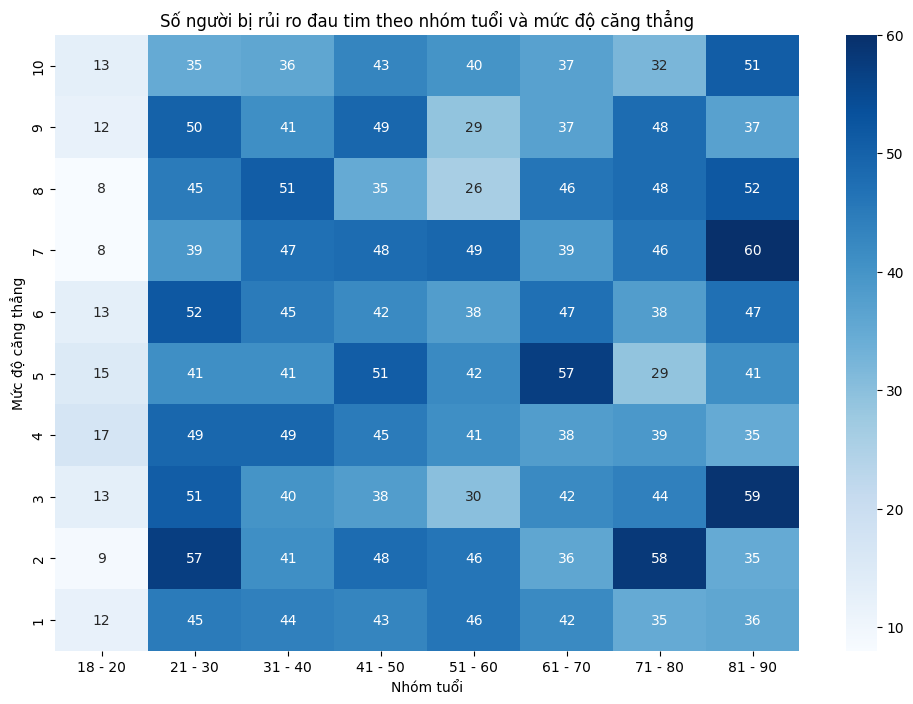

In [11]:
# Kích thước
plt.figure(figsize=(12, 8))

# Vẽ heatmap với dải màu xanh (Blues)
sns.heatmap(stat_arr, annot=True, cmap="Blues")


# Đặt tên cho trục X và Y
plt.xlabel("Nhóm tuổi")
plt.ylabel("Mức độ căng thẳng")

# Đặt tên cho biểu đồ
plt.title("Số người bị rủi ro đau tim theo nhóm tuổi và mức độ căng thẳng")


# Hiển thị biểu đồ
plt.show()

# Histogram: Tần suất bị tiểu đường ở từng nhóm tuổi.

1. **Các thuộc tính sử dụng**

- `Diabetes`: tình trạng béo phì của đối tượng được khảo sát (0:không, 1:có)
- `Age`: độ tuổi của các đối tượng được khảo sát.

2. **Loại biểu đồ**
   **Histogram**(biểu đồ tần suất): là một dạng biểu đồ dùng để biểu diễn sự phân bố của một tập dữ liệu số bằng cách chia các giá trị thành các khoảng (bins) và đếm số lượng giá trị thuộc mỗi khoảng.
3. **Ý nghĩa của biểu đồ**

      Biểu đồ thể hiện số lượng người bị mắc tiểu đường ở các nhóm tuổi 18 - 20, 21 - 30, 31 - 40, ..., 81 - 90

4. **Nguyên nhân sử dụng**

      Biểu đồ Histogram thể hiện sự phân bố tần suất giá trị trong dữ liệu qua từng nhóm

5. **Kết luận**

      - số người bị tiểu đường ở các nhóm tuổi đều cao và đồng đều nhau khoảng từ 300 đến 400 (người)
      - số người trong lứa tuổi từ 20 đến 40 bị tiểu đường là cao nhất, do lối sống sinh hoạt, ăn uống chưa được hài hòa và cân bằng, sử dụng nhiều đường trong khẩu phần ăn để gia tăng mức độ ngon cho món ăn nhưng cũng gia tăng nguy cơ bị tiểu đường khi mới còn trẻ
      - số người bị tiểu đường tăng đều từ 60 tuổi đến 90 tuổi, do tuổi tác cao, chức năng của các cơ quan giảm nên nguy cơ bị tiểu đường gia tăng theo
      - số người bị tiểu đường trong lứa tuổi 20 đến 40 cao hơn số người bị tiểu đường trong lứa tuổi 60 đến 90 tuổi, cho thấy nguy cơ bị tiểu đường ở giới trẻ đang ngày càng gia tăng, không chỉ riêng ở lứa tuổi trung niên và người già


Tạo ra mảng gồm cột Age của những người bị Diabete


In [12]:
age_diabetes = df[df["Diabetes"] == 1]["Age"].tolist()

vẽ biểu đồ


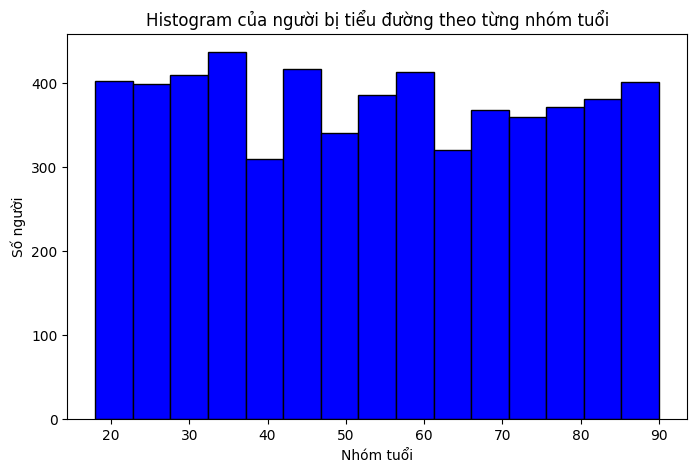

In [13]:
# Creating the histogram
plt.figure(figsize=(8, 5))

# Draw
plt.hist(age_diabetes, bins=15, color="blue", edgecolor="black")

plt.title("Histogram của người bị tiểu đường theo từng nhóm tuổi")
plt.xlabel("Nhóm tuổi")
plt.ylabel("Số người")

# Display the chart
plt.show()

# BOXPLOT: THỜI GIAN DÀNH CHO THỂ DỤC CỦA CÁC ĐỐI TƯỢNG BỊ ĐAU TIM Ở CÁC CHÂU LỤC PHÂN BỐ NHƯ THẾ NÀO

1. **Các thuộc tính sử dụng**

- `Exercise Hours Per Week`: thời gian dành cho thể dục thể thao của các đối tượng trong một tuần, tính theo đơn vị giờ.
- `Heart Attack Risk`: thuộc tính chỉ nhận 2 giá trị 0 (không) hoặc 1 (có), thể hiện nguy cơ mắc bệnh tim, giúp phân loại người có và - không có nguy cơ.
- `Continent`: châu lục.

2. **Loại biểu đồ**

      **Boxplot**: là một loại biểu đồ thống kê giúp hiển thị sự phân phối dữ liệu thông qua các chỉ số tóm tắt: giá trị nhỏ nhất, tứ phân vị đầu tiên (Q1), trung vị (Q2), tứ phân vị thứ ba (Q3), và giá trị lớn nhất.

3. **Ý nghĩa của biểu đồ**

      Biểu đồ thể hiện phạm vi các giá trị (giờ tập thể dục hàng tuần) ở các châu lục của người có rủi ro đau tim

4. **Nguyên nhân sử dụng**

      Biểu đồ boxplot thể hiện được sự phân bố các giá trị trong dữ liệu

5. **Kết luận**

- Số giờ tập thể dục hàng tuần của những người bị rủi ro đau tim ở các châu lục phân bố trong khoảng từ 5 đến 15, trung vị là 10, tức là chưa đến 2 tiếng 1 ngày, khá ít. Việc ít tập thể dục gây ra sức ì, gây ảnh hưởng đến hoạt động của tim, làm tăng rủi ro đau tim


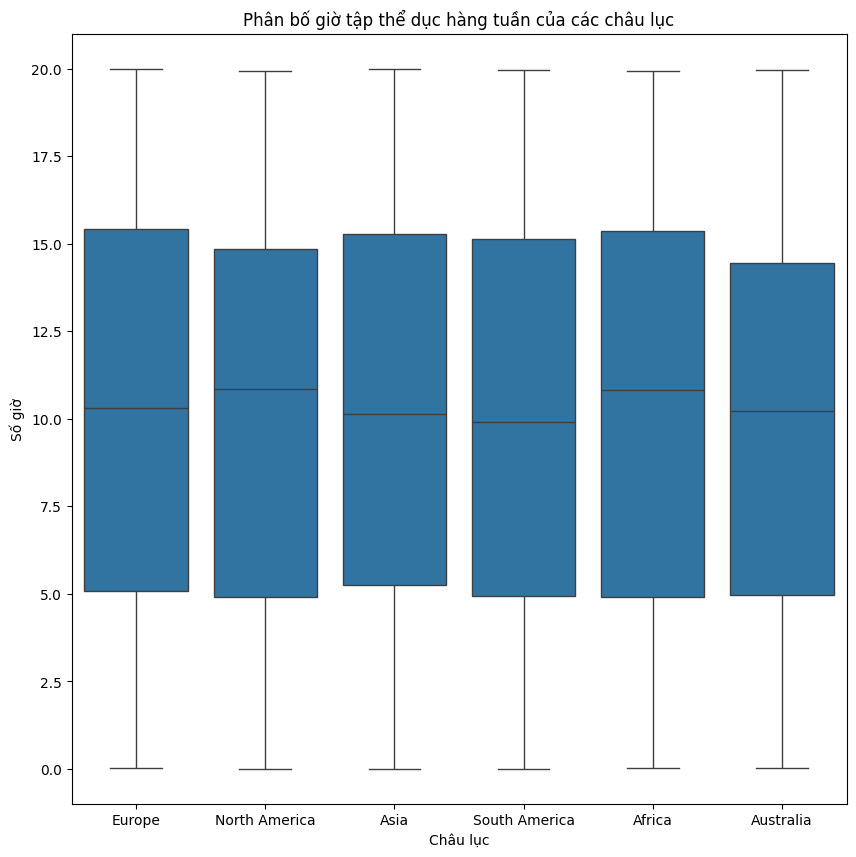

In [14]:
# Kích thước biểu đồ
plt.figure(figsize=(10, 10))

# Vẽ boxplot
sns.boxplot(x="Continent", y="Exercise Hours Per Week", data=df_heart_attack)

# Đặt tên cho biểu đồ
plt.title(
    "Phân bố giờ tập thể dục hàng tuần của các châu lục của người có rủi ro đau tim"
)

# Đặt tên 2 trục
plt.xlabel("Châu lục")
plt.ylabel("Số giờ")

# Hiển thị biểu đồ
plt.show()